<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Ridge_Regularizatin(L2_regularization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Types of Regularizatin :-
- Ridge(L2) regularization
- Lasso(L1) regularization
- Elastic Net

#L2 regularization :-

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [52]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [53]:
X,y=data.data, data.target

In [54]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [55]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [56]:
X.shape ,y.shape

((442, 10), (442,))

In [57]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
X_train.shape ,X_test.shape

((353, 10), (89, 10))

In [59]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [60]:
lr.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred=lr.predict(X_test)

In [62]:
from math import sqrt
from sklearn.metrics import r2_score ,mean_squared_error
print("r2 score :",r2_score(y_test,y_pred))
print("RMSE :",sqrt(mean_squared_error(y_test,y_pred)))

r2 score : 0.4399338661568968
RMSE : 55.627840795469155


#lets use ridge regressiom:-

In [63]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)

In [64]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [65]:
y_pred1=R.predict(X_test)
print("r2 score :",r2_score(y_test,y_pred1))
print("RMSE :",sqrt(mean_squared_error(y_test,y_pred1)))

r2 score : 0.4400429511552675
RMSE : 55.62242316881659


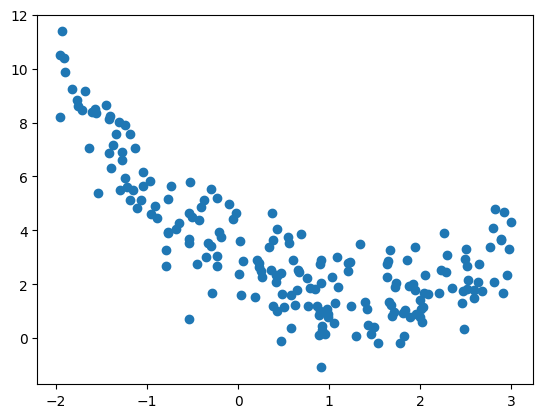

In [66]:
m=200
x1=5 * np.random.rand(m,1) -2
y1=0.7 * x1**2 - 2*x1 +3 + np.random.randn(m,1)

plt.scatter(x1,y1)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.00298e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.94831e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


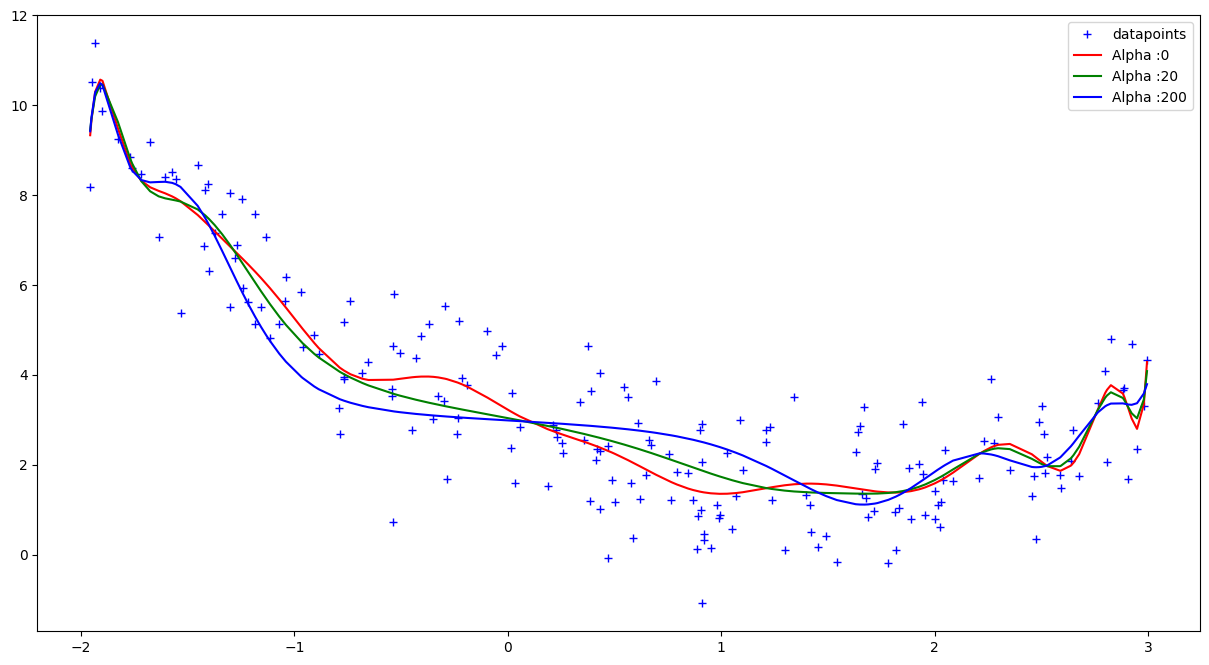

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,y1,alpha):
  model=Pipeline([
      ("polynomial_features",PolynomialFeatures(degree=20)),
      ("ridge",Ridge(alpha=alpha))
  ])

  model.fit(x1,y1)
  return model.predict(x1)

alphas=[0 ,20,200]
cs=['r','g','b']

plt.figure(figsize=(15,8))
plt.plot(x1,y1,'b+',label='datapoints')

for alpha,c in zip(alphas,cs):
  y_pred2=get_preds_ridge(x1,y1,alpha)
  plt.plot(sorted(x1[:,0]),y_pred2[np.argsort(x1[: ,0])] ,c,label="Alpha :{}".format(alpha))
plt.legend()
plt.show()

###In the above figure:
- red line shows overfitting
- blue line shows underfitting
- green line is good